In [4]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe scikit-learn matplotlib
!pip install mediapipe

ERROR: Could not find a version that satisfies the requirement tensorflow==2.8.0 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.8.0
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 635.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 13.5 MB/s eta 0:00:0000:0100:01
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 11.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.2
    Uninstalling protobuf-4.25.2:
     

In [5]:
!pip install google-auth-oauthlib==0.7.0

  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [6]:
!pip install --upgrade opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 18.8 MB/s eta 0:00:0000:0100:01


In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

2024-02-16 20:49:11.942 python[28818:732179] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1708102153.206157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<class 'type'>
<class 'numpy.ndarray'>
<

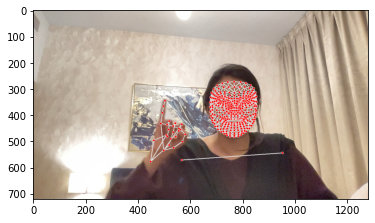

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        print(type(frame))

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(type(results))

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed',image)
        draw_landmarks(frame, results)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()

In [8]:
draw_landmarks(frame, results)

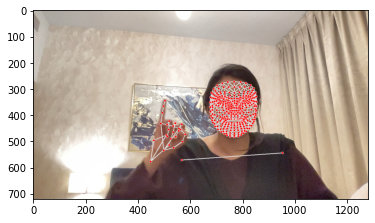

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.right_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()if results.face_landmarks else np.zeros(1404)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.60763371,  0.51936579, -0.49990994, ...,  0.39386782,
        0.48031354, -0.0172302 ])

In [17]:
np.save('0', result_test)

In [26]:
np.load('0.npy')

array([ 0.38663474,  0.40198216, -0.90657055, ...,  0.21591619,
        0.36274579, -0.03449356])

In [53]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')
#DATA_PATH = os.path.join('C:\\Users\\Bella Babu\\Desktop\\PROJECTS\\Aid to detect sign language\\MP_Data')

# Actions that we try to detect
actions = np.array(['I', 'need to','go toilet'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [54]:
for action in actions:
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [55]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1708103128.209873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M1


In [56]:
cap.release()
cv2.destroyAllWindows()

In [57]:
%pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [59]:
label_map = {label:num for num, label in enumerate(actions)}

In [60]:
label_map

{'I': 0, 'need to': 1, 'go toilet': 2}

In [61]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [62]:
np.array(sequences).shape

(90, 30, 1662)

In [63]:
np.array(labels).shape

(90,)

In [67]:
X = np.array(sequences)

In [65]:
X.shape

(90, 30, 1662)

In [68]:
y = to_categorical(labels).astype(int)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [70]:
y_test.shape

(5, 3)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [72]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [73]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [75]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
3/3 [==============================] - 2s 31ms/step - loss: 1.8144 - categorical_accuracy: 0.3059
Epoch 2/100
3/3 [==============================] - 0s 42ms/step - loss: 1.1920 - categorical_accuracy: 0.2353
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 1.0890 - categorical_accuracy: 0.3647
Epoch 4/100
3/3 [==============================] - 0s 33ms/step - loss: 1.1417 - categorical_accuracy: 0.4706
Epoch 5/100
3/3 [==============================] - 0s 38ms/step - loss: 1.0346 - categorical_accuracy: 0.5765
Epoch 6/100
3/3 [==============================] - 0s 35ms/step - loss: 0.9588 - categorical_accuracy: 0.5412
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.9256 - categorical_accuracy: 0.4941
Epoch 8/100
3/3 [==============================] - 0s 36ms/step - loss: 1.0511 - categorical_accuracy: 0.4471
Epoch 9/100
3/3 [==============================] - 0s 33ms/step - loss: 0.9910 - categorical_accuracy: 0.5294
Epoch 10/1

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

In [77]:
res = model.predict(X_test)

1/1 [==============================] - 0s 234ms/step


In [78]:
actions[np.argmax(res[1])]

'go toilet'

In [79]:
actions[np.argmax(y_test[1])]

'go toilet'

In [80]:
model.save('action.h5')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
model.load_weights('action.h5')

In [82]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [83]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [84]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [85]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]])

In [86]:
accuracy_score(ytrue, yhat)

1.0

In [87]:
from scipy import stats

In [88]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

In [92]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.3

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]


        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])


        #3. Viz logic
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1708103791.672868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M1


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

: 